# Correlation and Regression with Python
<div style="text-align: right">Versão 2023-05-09</div>

## **André Lage Freitas** 
- **Associate Professor** at Universidade Federal de Alagoas (UFAL)
- **PhD in Computer Science** from the [_Institut National des Sciences Appliquées de Rennes_ (France)](https://www.insa-rennes.fr/)
- [Follow on LinkedIn](www.linkedin.com/comm/mynetwork/discovery-see-all?usecase=PEOPLE_FOLLOWS&followMember=lage), [Follow on YouTube](https://www.youtube.com/channel/UCLPXTzvZ8IFrU6hBTeo1C-Q)


# Linear Regression and Correlation for Public Relations Students

In this notebook, we will explore regression and linear correlation techniques in the context of Public Relations. We will use Python and relevant libraries to analyze and visualize data, interpret the results, and understand the practical implications for PR strategies.

## Goal 

**Problem: How to know if two variables are linearly correlated?**

- Checklist
   1. Simple summary statistics
   1. Pearson's Coeficient: if it tends to a linear correlation, then we can use the Linear Regression to represent the correlation
   1. We use Linear Regression and then assess it (e.g. R-squared Score).

## Importing Required Libraries

First, let's import the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset

Load a sample dataset for PR analysis. Replace `correlation-regression-dataset.csv` with the path to your own CSV file.

In [2]:
data = pd.read_csv('correlation-regression-dataset.csv')
# data = pd.read_csv('correlation-regression-dataset-2.csv')
data


,advertising_budget,social_media_followers,sales
0,1000,2000,9000
1,2000,4000,18000
2,3000,6000,26000
3,4000,8000,34000
4,5000,10000,42000
5,6000,12000,50000
6,7000,14000,58000
7,8000,16000,66000
8,9000,18000,74000
9,10000,20000,82000


## Exploratory Data Analysis and Visualization

Perform exploratory data analysis and create visualizations to understand the relationships between variables in the dataset.

In [21]:
data.describe() # summary


,advertising_budget,social_media_followers,sales
count,20.000000,20.000000,20.000000
mean,10500.000000,18250.000000,83200.000000
std,5916.079783,8777.213321,44260.710865
min,1000.000000,2000.000000,9000.000000
25%,5750.000000,11500.000000,48000.000000
50%,10500.000000,20500.000000,85500.000000
75%,15250.000000,25250.000000,118750.000000
max,20000.000000,30000.000000,152000.000000


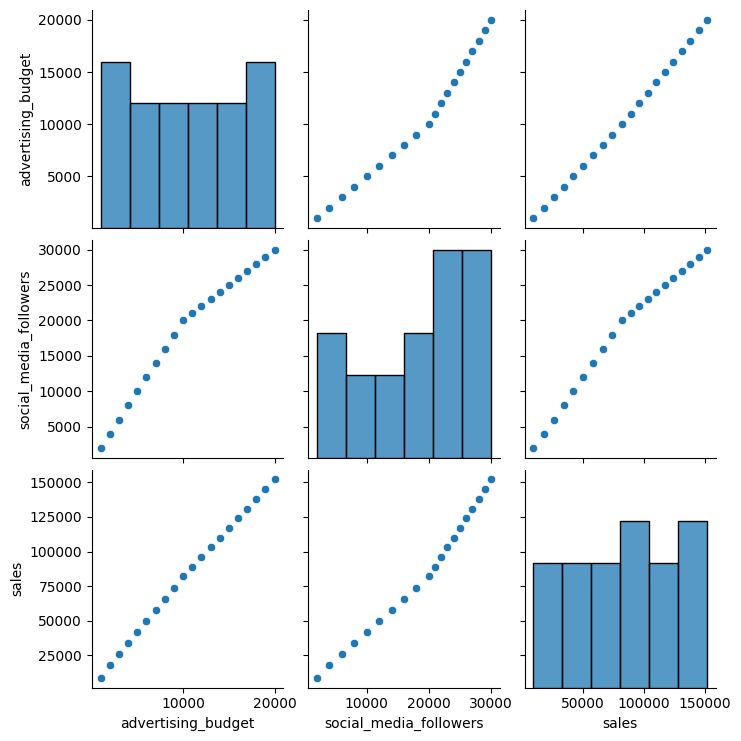

In [22]:
sns.pairplot(data)
plt.show()


## Simple Linear Regression

Fit a simple linear regression model to the data and evaluate its performance.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = data[['social_media_followers']]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 65930972.2272707
R-squared Score: 0.9810879442866253


In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

# X = data[['social_media_followers']]
# y = data['sales']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Perform polynomial transformation
# poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# model = LinearRegression()
# model.fit(X_train_poly, y_train)

# y_pred = model.predict(X_test_poly)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared Score:", r2)


# import numpy as np
# import matplotlib.pyplot as plt

# # Create scatter plot of actual data points
# plt.scatter(X_test, y_test, color='blue', label='Actual')

# # Sort X_test for plotting the curve
# sorted_indices = X_test.squeeze().argsort()
# X_test_sorted = X_test.squeeze().values[sorted_indices]
# y_pred_sorted = y_pred[sorted_indices]

# # Generate points for the polynomial curve
# X_curve = np.linspace(X_test_sorted.min(), X_test_sorted.max(), 100)
# X_curve_poly = poly.transform(X_curve.reshape(-1, 1))
# y_curve = model.predict(X_curve_poly)

# # Plot the polynomial curve
# plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')

# plt.xlabel('Social Media Followers')
# plt.ylabel('Sales')
# plt.title('Actual vs. Predicted Values with Polynomial Regression')
# plt.legend()
# plt.show()


### Interpreting the results

- **Mean Squared Error (MSE)**: The MSE is a measure of the average squared difference between the predicted values and the actual values. In this case, the MSE is 7,085,847.9. This number might seem large, but it's essential to understand that the magnitude of the MSE depends on the scale of the target variable (sales, in this case). It's generally challenging to interpret the MSE in isolation, so we often use other metrics like the R-squared score to better understand the model's performance.

- **R-squared Score**: The R-squared score, also known as the coefficient of determination, is a measure of how well the model explains the variance in the data. It ranges from 0 to 1, where 0 indicates that the model explains none of the variance and 1 indicates that the model explains all of the variance. In this case, the R-squared score is 0.9979674507179112, which is very close to 1. This means that the linear regression model explains approximately 99.8% of the variance in the sales data, which is an excellent result.

Based on the R-squared score, **the linear regression model seems to have performed very well in capturing the relationship between the independent variable (`advertising_budget`) and the dependent variable (`sales`)**. However, it's important to remember that a high R-squared score doesn't always guarantee that the model is perfect or that it will generalize well to new data. Always consider other factors, such as the quality of the data and potential biases, when interpreting the results and making decisions based on the model's predictions.

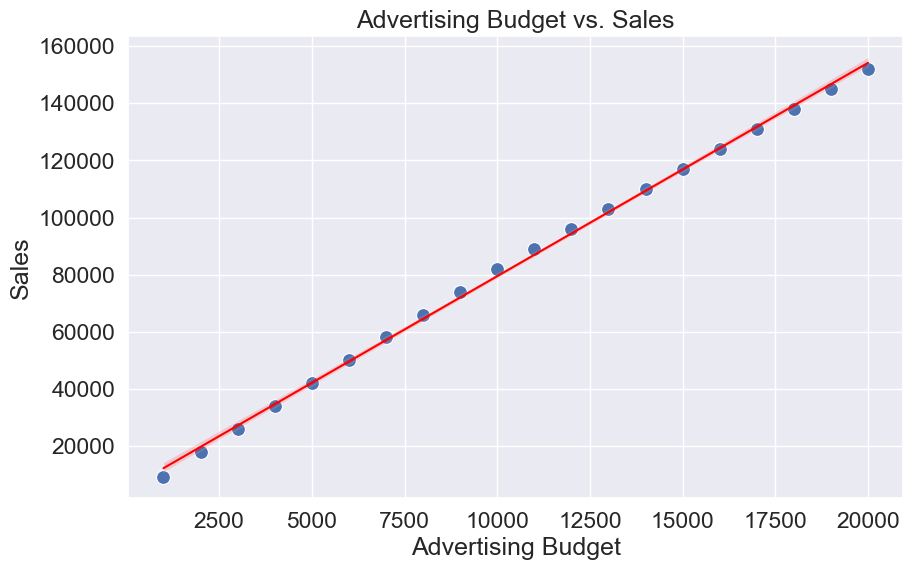

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

# Plot advertising_budget vs. sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='advertising_budget', y='sales', s=100)
sns.regplot(data=data, x='advertising_budget', y='sales', scatter=False, color='red', line_kws={'linewidth': 1.5})
plt.title('Advertising Budget vs. Sales')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.show()

# # Plot social_media_followers vs. sales
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data, x='social_media_followers', y='sales')
# sns.regplot(data=data, x='social_media_followers', y='sales', scatter=False, color='red', line_kws={'linewidth': 2})
# plt.title('Social Media Followers vs. Sales')
# plt.xlabel('Social Media Followers')
# plt.ylabel('Sales')
# plt.show()


### Exercise

Analyze the performance of the linear model for the `social_media_followers` variable.

## Spurious Correlation

**WARNING!** Do NOT misunderstand correlation Vs. Causation! For example, see [Spurious Correlation](https://www.tylervigen.com/spurious-correlations).

In [13]:
# TODO 

## Correlation Analysis

Linear correlation is a measure of the association between two variables. It is quantified using the Pearson correlation coefficient, which ranges from `-1` to `1`. The correlation coefficient indicates both the strength and direction of the relationship between the variables.

- A correlation coefficient of 1 indicates a perfect positive linear relationship, where an increase in one variable corresponds to a proportional increase in the other variable.
- A correlation coefficient of -1 indicates a perfect negative linear relationship, where an increase in one variable corresponds to a proportional decrease in the other variable.
- A correlation coefficient of 0 indicates no linear relationship between the variables.

It's important to remember that **correlation does not imply causation**. A strong correlation between two variables does not necessarily mean that one variable causes changes in the other. There might be other underlying factors or confounding variables that affect both variables.

Moreover, the  correlation analysis help to understand the relationships between different variables. It can provide insights into which variables are strongly related to the target variable (e.g., sales) and which variables are unrelated. This information can be valuable when selecting features for a machine learning model, such as linear regression, as it helps identify the most important variables that could improve the model's performance.

Now, let's compute Pearson's correlation coefficient for the variables and visualize the correlation matrix.

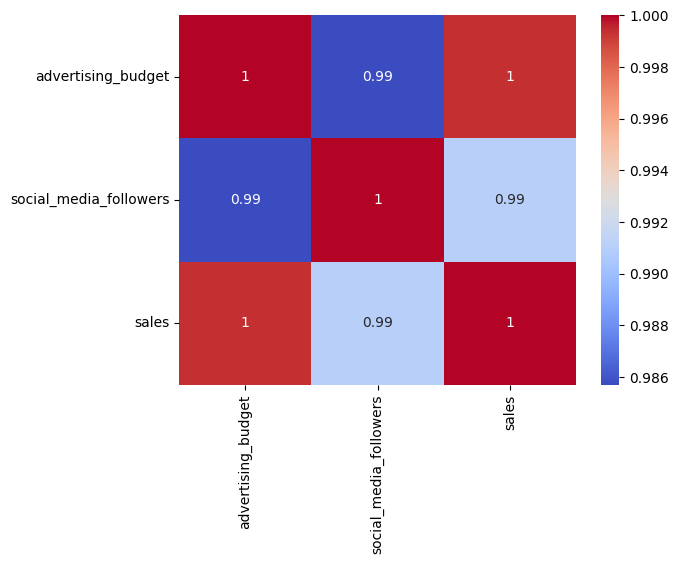

In [6]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Interpreting teh Correlation Matrix

In the correlation matrix example, we used the three variables from the dataset: advertising_budget, social_media_followers, and sales. The goal is to compute the correlation coefficients between each pair of variables and present the results in a matrix form. This can help you understand the relationships between the variables and identify any potential multicollinearity issues.

Here's an explanation of the correlation matrix for the given variables:

1. **advertising_budget vs. advertising_budget**: The correlation coefficient of a variable with itself is always 1, as there is a perfect positive linear relationship between a variable and itself.
1. **advertising_budget vs. social_media_followers**: The correlation coefficient between these two variables indicates the strength and direction of their linear relationship. A high positive value suggests that higher advertising budgets are associated with more social media followers, while a high negative value indicates that higher advertising budgets are associated with fewer social media followers.
1. **advertising_budget vs. sales**: The correlation coefficient between these two variables indicates the strength and direction of their linear relationship. A high positive value suggests that higher advertising budgets are associated with higher sales, while a high negative value indicates that higher advertising budgets are associated with lower sales.
1. **social_media_followers vs. social_media_followers**: Similar to the case with advertising_budget, the correlation coefficient of a variable with itself is always 1.
1. **social_media_followers vs. sales**: The correlation coefficient between these two variables indicates the strength and direction of their linear relationship. A high positive value suggests that a higher number of social media followers is associated with higher sales, while a high negative value indicates that a higher number of social media followers is associated with lower sales.
1. **sales vs. sales**: As with the other two variables, the correlation coefficient of a variable with itself is always 1.

In summary, the correlation matrix provides a convenient way to visualize the relationships between multiple variables. By analyzing the correlation coefficients, you can gain insights into which variables are strongly related to the target variable (e.g., sales) and which variables might be collinear (i.e., highly correlated with each other). This information can be useful when building a linear regression model, as it can help you select the most relevant features and avoid multicollinearity issues.


### Exercise

Use another dataset and execute all the codes againa. Did you get the same results? Why?

## Summary

In this notebook, we explored regression and linear correlation techniques and applied them to a Public Relations dataset. We used Python and its libraries to analyze the data, fit a simple linear regression model, and visualize the relationships between variables.

Use the insights gained from this analysis to inform your PR strategies and decision-making. Remember to consider the limitations of your analysis and the potential influence of factors not included in your model.